In [1]:
import pandas as pd #Pandas for data extraction
import numpy as np #Numpy for array operations
import random #Package for generating random weight aat first epoch
from sklearn.model_selection import train_test_split #Package for splitting data

import warnings #ignore warnings
warnings.filterwarnings('ignore')

# Import CSV Data

In [2]:
data = pd.read_csv(r'E:\Documents\University Assignments\NN and DL\Individual Project\ce889_dataCollection.csv')

In [3]:
#1st row value is in columns so np.vstack whill bring columns to row.
data = pd.DataFrame(np.vstack([data.columns, data]))

#Renaming data columns
data.rename({0:'Distance X',1:'Distance Y',2:'Velocity X',3:'Velocity Y'},inplace = True,axis = 1)

In [4]:
copy = data.copy()

# Convert Object to Float DataType

In [5]:
#Converting object types to float.

data['Distance X'] = data['Distance X'].astype('float')
data['Distance Y'] = data['Distance Y'].astype('float')
data['Velocity X'] = data['Velocity X'].astype('float')
data['Velocity Y'] = pd.to_numeric(data['Velocity Y'],errors='coerce')
data = data.astype('float')

In [6]:
data.dtypes

Distance X    float64
Distance Y    float64
Velocity X    float64
Velocity Y    float64
dtype: object

In [7]:
data.head()

,Distance X,Distance Y,Velocity X,Velocity Y
0,-543.130045,345.500000,0.200000,0.000000
1,-543.130045,345.300000,0.300000,0.040000
2,-543.170045,345.000000,0.400000,0.000000
3,-543.170045,344.600000,0.301946,0.012165
4,-543.182210,344.298054,0.204985,-0.062564


In [8]:
data.shape

(10529, 4)

In [9]:
data.describe()

,Distance X,Distance Y,Velocity X,Velocity Y
count,10529.000000,10529.000000,10529.000000,10529.000000
mean,-42.534655,313.712555,1.611521,-0.422216
std,256.989477,89.279648,2.387253,2.112826
min,-634.511377,65.631233,-4.011456,-6.960032
25%,-208.864571,270.555770,-0.225198,-1.760698
50%,-15.757649,345.599878,1.000000,-0.172787
75%,101.259129,368.476912,3.200293,0.698061
max,510.435573,558.063208,7.986235,6.397981


In [10]:
d = data.copy()

In [11]:
#Creating New Columns Because I will fill them as the model is learning and building

d['Predicted X'] = 0
d['Predicted Y'] = 0
d['Error1'] = 0
d['Error2'] = 0
d['Error1_Square'] = 0
d['Error2_Square'] = 0
d['Error_Average'] = 0
d.fillna(0,inplace = True)

In [12]:
d.head()

,Distance X,Distance Y,Velocity X,Velocity Y,Predicted X,Predicted Y,Error1,Error2,Error1_Square,Error2_Square,Error_Average
0,-543.130045,345.500000,0.200000,0.000000,0,0,0,0,0,0,0
1,-543.130045,345.300000,0.300000,0.040000,0,0,0,0,0,0,0
2,-543.170045,345.000000,0.400000,0.000000,0,0,0,0,0,0,0
3,-543.170045,344.600000,0.301946,0.012165,0,0,0,0,0,0,0
4,-543.182210,344.298054,0.204985,-0.062564,0,0,0,0,0,0,0


In [13]:
d.describe()

,Distance X,Distance Y,Velocity X,Velocity Y,Predicted X,Predicted Y,Error1,Error2,Error1_Square,Error2_Square,Error_Average
count,10529.000000,10529.000000,10529.000000,10529.000000,10529.0,10529.0,10529.0,10529.0,10529.0,10529.0,10529.0
mean,-42.534655,313.712555,1.611521,-0.422216,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,256.989477,89.279648,2.387253,2.112826,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-634.511377,65.631233,-4.011456,-6.960032,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-208.864571,270.555770,-0.225198,-1.760698,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,-15.757649,345.599878,1.000000,-0.172787,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,101.259129,368.476912,3.200293,0.698061,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,510.435573,558.063208,7.986235,6.397981,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Create a Function to Normilization the data between 0-1

def normilization(x,mins,maxs):
    a = (x-mins)/(maxs-mins)
    return a

In [15]:
d['Distance X'] = np.vectorize(normilization)(d['Distance X'],d['Distance X'].min(), d['Distance X'].max())
d['Distance Y'] = np.vectorize(normilization)(d['Distance Y'],d['Distance Y'].min(), d['Distance Y'].max())
d['Velocity X'] = np.vectorize(normilization)(d['Velocity X'],d['Velocity X'].min(), d['Velocity X'].max())
d['Velocity Y'] = np.vectorize(normilization)(d['Velocity Y'],d['Velocity Y'].min(), d['Velocity Y'].max())

In [16]:
#Reset index for 0 to end and will drop the old index
d.reset_index(inplace = True,drop = True)

In [17]:
d.head()

,Distance X,Distance Y,Velocity X,Velocity Y,Predicted X,Predicted Y,Error1,Error2,Error1_Square,Error2_Square,Error_Average
0,0.079813,0.568340,0.351022,0.521038,0,0,0,0,0,0,0
1,0.079813,0.567934,0.359357,0.524032,0,0,0,0,0,0,0
2,0.079778,0.567325,0.367692,0.521038,0,0,0,0,0,0,0
3,0.079778,0.566512,0.359519,0.521949,0,0,0,0,0,0,0
4,0.079767,0.565899,0.351438,0.516354,0,0,0,0,0,0,0


In [18]:
d.shape

(10529, 11)

In [19]:
#export = d[['Distance X','Distance Y','Velocity X','Velocity Y']]

In [20]:
#export.to_csv('keerthan_data.csv')

# Manual Neural Network

# Forward Propogation/Bach Proporgation

In [21]:
global wi1,wi2,neurons,wo1,wo2,mse,final_mse,previousbi1,previousbi2,Plot_Mse,Plot_Epoch,momentum,previousbo1,previousbo2
neurons = 2 #Neurons for hidden layer
Epoch = 50 #Epoched (i.e Iterations)
wi1 = {} #Weights going from input layer 1 to all hidden neurons
wi2 = {} #Weights going from input layer 2 to all hidden neurons
bi = 0 #Bias 1
bo = 0 #Bias 2
momentum = 0.2 #Momentum when updating weights
wo1 = {} #Weights coming to output layer 1 from all hidden neurons
wo2 = {} #Weights coming to output layer 1 from all hidden neurons
mse = [] #Mean Sqyared Error Calculation list
previousbi1 = {} #Recording previous weights to add it to the next weight calculation
previousbi2 = {}
previousbo1 = {}
previousbo2 = {}

#Plot Variables
Plot_Epoch = [] #Create variable to plot epoch
Plot_Mse = []

print('hello')
for epoch in range(1,Epoch): #Iterate to number of epoches
    Plot_Epoch.append(epoch)
    for z in range(d.shape[0]): #Iterate all the data for the total number of epoches
         
        #***************************************Forward Proporgation Starts**********************************************
        
        #***********************Create all weights for input based on total number of neurons****************************
        
        if len(wi1) == 0 and len(wi2) == 0:
            def first():
                for x in range(1,neurons+1):
                    
                    #Define Weights for 1st Input to total Hidden Neuorns
                    wi1["w1{0}".format(x)] = random.uniform(0.1,0.9)
                    wi1["w1{0}".format(x)] = float('{0:.2f}'.format(wi1["w1{0}".format(x)]))
                    
                    wi2["w2{0}".format(x)] = random.uniform(0.1,0.9)
                    wi2["w2{0}".format(x)] = float('{0:.1f}'.format(wi2["w2{0}".format(x)]))
            
            first()
        
        #******************************Calculate 'V' for hidden layer***************************************************** 
        def input_layer(x1,x2):
            global vi
            vi = {}
            
            for x in range(1,neurons+1):
                
                #Define V for 1st Input to Total Hidden Neurons
                vi["vi{0}".format(x)] = (x1*wi1["w"+str(1)+"{0}".format(x)]) + (x2*wi2["w"+str(2)+"{0}".format(x)]) + (bi * 1)
        input_layer(d['Distance X'][z],d['Distance Y'][z])
        
        
        #*******************************Hidden Layer Calculation (Sigmoid Activation Function)***************************
        def hidden_layer():
            global h
            h = {}
            
            for x in range(1,neurons+1):
                
                h["h{0}".format(x)] = 1/(1+np.exp(-0.6*vi["vi{0}".format(x)]))
        hidden_layer()
        
        #******************************Calculate all Weights for output based on total number of neurons******************
        if len(wo1) == 0 and len(wo2) == 0:
            def second():
                for i in range(1, neurons+1):
                    wo1["w"+str(i)+"{0}".format(1)] = random.uniform(0.1,0.9)
                    wo1["w"+str(i)+"{0}".format(1)] = float('{0:.2f}'.format(wo1["w"+str(i)+"{0}".format(1)]))
                    
                    wo2["w"+str(i)+"{0}".format(2)] = random.uniform(0.1,0.9)
                    wo2["w"+str(i)+"{0}".format(2)] = float('{0:.2f}'.format(wo2["w"+str(i)+"{0}".format(2)]))
            second()
        
        #************************************Calculate V for output prediction*********************************************
        def output_layer():
            global vo1,vo2
            vo1 = []
            vo2 = []
            
            for x in range(1,neurons+1):
                
                vo1.append(h["h{0}".format(x)] * wo1["w"+str(x)+"{0}".format(1)])
                vo2.append(h["h{0}".format(x)] * wo2["w"+str(x)+"{0}".format(2)])
            
            vo1 = sum(vo1)+(bo*1)
            vo2 = sum(vo2)+(bo*1)
        output_layer()
        
        #******************************************Calculate Output Prediction*******************************************
        def output():
            global y1,y2
            
            y1 = 1/(1+np.exp(-0.6*vo1))
            y2 = 1/(1+np.exp(-0.6*vo2))
            
            d['Predicted X'][z] = y1
            d['Predicted Y'][z] = y2
        output()
        
        #*************************************Calculate Error by Desired-Predicted****************************************
        def error():
            global e1,e2
            
            d['Error1'][z] = d['Velocity X'][z] - d['Predicted X'][z]
            d['Error2'][z] = d['Velocity Y'][z] - d['Predicted Y'][z]
        error()
        
        #*******************************************FORWARD PROPORGATION ENDS********************************************
        
        
        #********************************************BACKPROPOGATION STARTS**********************************************
        
        global wbi1,wbi2,wbo1,wbo2
        wbi1 = {}
        wbi2 = {}
        wbo1 = {}
        wbo2 = {}
        
        #*******************Create Empty Random Weights so later just update it with the actual updated value*************
        def firstb():
            for x in range(1,neurons+1):
                
                #Define Weights for 1st Input to total Hidden Neuorns
                wbi1["w1{0}".format(x)] = random.uniform(0.1,0.9)
                wbi1["w1{0}".format(x)] = float('{0:.2f}'.format(wbi1["w1{0}".format(x)]))
                
                wbi2["w2{0}".format(x)] = random.uniform(0.1,0.9)
                wbi2["w2{0}".format(x)] = float('{0:.1f}'.format(wbi2["w2{0}".format(x)]))
                
                wbo1["w"+str(x)+"{0}".format(1)] = random.uniform(0.1,0.9)
                wbo1["w"+str(x)+"{0}".format(1)] = float('{0:.2f}'.format(wbo1["w"+str(x)+"{0}".format(1)]))
                
                wbo2["w"+str(x)+"{0}".format(2)] = random.uniform(0.1,0.9)
                wbo2["w"+str(x)+"{0}".format(2)] = float('{0:.2f}'.format(wbo2["w"+str(x)+"{0}".format(2)]))
        
        firstb()
        
        #*****************************output to hidden layer weights updataion*********************************
        def output_hidden():
            global oh1,oh2
            
            oh1 = 0.6*y1*(1-y1)*d['Error1'][z] #(Gradient 1)
            oh2 = 0.6*y2*(1-y2)*d['Error2'][z] #(Gradient 2)
            
            if epoch == 1: #If epoch is 1 then it wont multiply previous weights and update it
                            
                for x in range(1,neurons+1):
                    wbo1["w"+str(x)+"{0}".format(1)] = 0.01*oh1*wo1["w"+str(x)+"{0}".format(1)]
                    wbo2["w"+str(x)+"{0}".format(2)] = 0.01*oh2*wo2["w"+str(x)+"{0}".format(2)]
                    
                    #Appending the current weight so later this can be multiplied woth the current weight
                    previousbo1["w"+str(x)+"{0}".format(1)] = wbo1["w"+str(x)+"{0}".format(1)]
                    previousbo2["w"+str(x)+"{0}".format(2)] = wbo2["w"+str(x)+"{0}".format(2)]
            else:#if epoch is not ==1 then update previous weights
                                
                for x in range(1,neurons+1):
                    wbo1["w"+str(x)+"{0}".format(1)] = 0.01*oh1*wo1["w"+str(x)+"{0}".format(1)] + (momentum*previousbo1["w"+str(x)+"{0}".format(1)])
                    wbo2["w"+str(x)+"{0}".format(2)] = 0.01*oh2*wo2["w"+str(x)+"{0}".format(2)] + (momentum*previousbo2["w"+str(x)+"{0}".format(2)])
                
                    wo1["w"+str(x)+"{0}".format(1)] += wbo1["w"+str(x)+"{0}".format(1)]
                    wo2["w"+str(x)+"{0}".format(2)] += wbo2["w"+str(x)+"{0}".format(2)]
                    
                    previousbo1["w"+str(x)+"{0}".format(1)] = wbo1["w"+str(x)+"{0}".format(1)]
                    previousbo2["w"+str(x)+"{0}".format(2)] = wbo2["w"+str(x)+"{0}".format(2)]                
        output_hidden()        
        
        #****************************Hidden Layer to Input Layer Weight Uodatation*********************************
        def hidden_output():
            global hi
            hi = {}
            
            #**************************************updating weight from hidden to input layer*******************************
            for i in range(1,len(h)+1):
                hi["hi"+str(i)] = (0.6*h["h"+str(i)]*(1-h["h"+str(i)])) * (oh1*wo1["w"+str(i)+"{0}".format(1)] + oh2*wo2["w"+str(i)+"{0}".format(2)])
            
            if epoch == 1: #If epoch is 1 then it wont multiply previous weights and update it
                for i in range(1,neurons+1):
                    wbi1[list(wbi1.keys())[i-1]] = 0.01*hi["hi"+str(i)]*wi1["w1"+"{0}".format(i)]
                    wbi2[list(wbi2.keys())[i-1]] = 0.01*hi["hi"+str(i)]*wi2["w2"+"{0}".format(i)]
                    
                    previousbi1["w1"+str(i)] = wbi1["w1"+str(i)]
                    previousbi2["w2"+str(i)] = wbi2["w2"+str(i)]
            else:
                #if epoch is not ==1 then update previoud weights
                for i in range(1,neurons+1):
                    wbi1[list(wbi1.keys())[i-1]] = 0.01*hi["hi"+str(i)]*wi1["w1"+"{0}".format(i)] + (momentum*previousbi1["w1"+str(i)])
                    wbi2[list(wbi2.keys())[i-1]] = 0.01*hi["hi"+str(i)]*wi2["w2"+"{0}".format(i)] + (momentum*previousbi2["w2"+str(i)])
                    
                    #Update previous weight so we can sum and add them later.
                    previousbi1["w1"+str(i)] = wbi1["w1"+str(i)]
                    previousbi2["w2"+str(i)] = wbi2["w2"+str(i)]
                    
            #***************************************Updating all the weights**********************************************       
            
            for i in range(1,neurons+1):
                wi1["w1"+str(i)] += wbi1["w1"+str(i)]
                wi2["w2"+str(i)] += wbi2["w2"+str(i)]
                
                wo1["w"+str(i)+"{0}".format(1)] += wbo1["w"+str(i)+"{0}".format(1)]
                wo2["w"+str(i)+"{0}".format(2)] += wbo2["w"+str(i)+"{0}".format(2)]                
        hidden_output()
    #********************************************Backpropogation Ends********************************************************
    
    #************************************Calculate metrics for ploting and accuracy*******************************************
    def mse():
        d['Error1_Square'] = d['Error1']*d['Error1']
        d['Error2_Square'] = d['Error2']*d['Error2']
        d['Error_Average'] = d['Error1_Square']+d['Error2_Square']/2
        Plot_Mse.append(d['Error_Average'].mean())
        return d['Error_Average'].mean()
            
    print('The Epoch is ',epoch, 'and mse is:- ',mse())

hello
The Epoch is  1 and mse is:-  0.061700395375830656
The Epoch is  2 and mse is:-  0.05450000978380741
The Epoch is  3 and mse is:-  0.05341431535437461
The Epoch is  4 and mse is:-  0.05321942244909414
The Epoch is  5 and mse is:-  0.053164847797445916
The Epoch is  6 and mse is:-  0.053146731234028674
The Epoch is  7 and mse is:-  0.053139781326006746
The Epoch is  8 and mse is:-  0.05313667314233756
The Epoch is  9 and mse is:-  0.05313507318796591
The Epoch is  10 and mse is:-  0.05313415975667571
The Epoch is  11 and mse is:-  0.053133603868946666
The Epoch is  12 and mse is:-  0.05313325336916395
The Epoch is  13 and mse is:-  0.053133028184604546
The Epoch is  14 and mse is:-  0.053132882075079955
The Epoch is  15 and mse is:-  0.05313278677032389
The Epoch is  16 and mse is:-  0.05313272442323846
The Epoch is  17 and mse is:-  0.053132683568837685
The Epoch is  18 and mse is:-  0.05313265677185683
The Epoch is  19 and mse is:-  0.053132639184941405
The Epoch is  20 and mse 

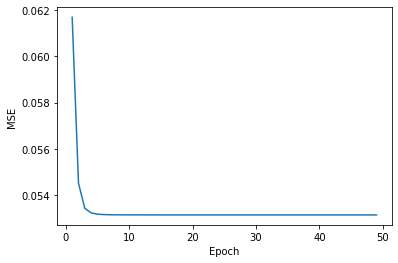

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(Plot_Epoch,Plot_Mse)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [23]:
d.head()

,Distance X,Distance Y,Velocity X,Velocity Y,Predicted X,Predicted Y,Error1,Error2,Error1_Square,Error2_Square,Error_Average
0,0.079813,0.568340,0.351022,0.521038,0.5,0.5,-0.148978,0.021038,0.022194,0.000443,0.022416
1,0.079813,0.567934,0.359357,0.524032,0.5,0.5,-0.140643,0.024032,0.019780,0.000578,0.020069
2,0.079778,0.567325,0.367692,0.521038,0.5,0.5,-0.132308,0.021038,0.017505,0.000443,0.017727
3,0.079778,0.566512,0.359519,0.521949,0.5,0.5,-0.140481,0.021949,0.019735,0.000482,0.019976
4,0.079767,0.565899,0.351438,0.516354,0.5,0.5,-0.148562,0.016354,0.022071,0.000267,0.022204


In [24]:
#*********************************Denormalization function****************************************

#def denormalize(X,mins,maxs):
#    a = maxs-mins
#    b = (X-0)/(1-0)
#    Value = mins +(b*a)
#    return Value

In [25]:
#d['Distance X'] = np.vectorize(denormalize)(d['Distance X'],data['Distance X'].min(), data['Distance X'].max())
#d['Distance Y'] = np.vectorize(denormalize)(d['Distance Y'],data['Distance Y'].min(), data['Distance Y'].max())
#d['Velocity X'] = np.vectorize(denormalize)(d['Velocity X'],data['Velocity X'].min(), data['Velocity X'].max())
#d['Velocity Y'] = np.vectorize(denormalize)(d['Velocity Y'],data['Velocity Y'].min(), data['Velocity Y'].max())
#d['Predicted X'] = np.vectorize(denormalize)(d['Predicted X'],data['Velocity X'].min(), data['Velocity X'].max())
#d['Predicted Y'] = np.vectorize(denormalize)(d['Predicted Y'],data['Velocity Y'].min(), data['Velocity Y'].max())

In [26]:
d.head()

,Distance X,Distance Y,Velocity X,Velocity Y,Predicted X,Predicted Y,Error1,Error2,Error1_Square,Error2_Square,Error_Average
0,0.079813,0.568340,0.351022,0.521038,0.5,0.5,-0.148978,0.021038,0.022194,0.000443,0.022416
1,0.079813,0.567934,0.359357,0.524032,0.5,0.5,-0.140643,0.024032,0.019780,0.000578,0.020069
2,0.079778,0.567325,0.367692,0.521038,0.5,0.5,-0.132308,0.021038,0.017505,0.000443,0.017727
3,0.079778,0.566512,0.359519,0.521949,0.5,0.5,-0.140481,0.021949,0.019735,0.000482,0.019976
4,0.079767,0.565899,0.351438,0.516354,0.5,0.5,-0.148562,0.016354,0.022071,0.000267,0.022204


In [27]:
d.describe()

,Distance X,Distance Y,Velocity X,Velocity Y,Predicted X,Predicted Y,Error1,Error2,Error1_Square,Error2_Square,Error_Average
count,10529.000000,10529.000000,10529.000000,10529.000000,10529.0,1.052900e+04,10529.000000,10529.000000,1.052900e+04,1.052900e+04,10529.000000
mean,0.517034,0.503788,0.468672,0.489430,0.5,5.000000e-01,-0.031328,-0.010570,4.056919e-02,2.512684e-02,0.053133
std,0.224455,0.181304,0.198976,0.158169,0.0,2.508321e-12,0.198976,0.158169,4.646689e-02,3.613151e-02,0.047489
min,0.000000,0.000000,0.000000,0.000000,0.5,5.000000e-01,-0.500000,-0.500000,5.219027e-10,8.010133e-11,0.000072
25%,0.371761,0.416148,0.315582,0.389230,0.5,5.000000e-01,-0.184418,-0.110770,7.792942e-03,5.775572e-04,0.020991
50%,0.540421,0.568543,0.417702,0.508103,0.5,5.000000e-01,-0.082298,0.008103,2.600915e-02,9.477960e-03,0.039893
75%,0.642624,0.615000,0.601095,0.573296,0.5,5.000000e-01,0.101095,0.073296,5.523814e-02,3.634674e-02,0.067839
max,1.000000,1.000000,1.000000,1.000000,0.5,5.000000e-01,0.500000,0.500000,2.500000e-01,2.500000e-01,0.258230


In [28]:
#**********************Export the final trained weights to file to use and predict the game value***************************
def variables():
    
    f = open('variables.py', 'w')
    f.write('wi1 = '+ str(wi1) + '\n')
    f.write('wi2 = '+ str(wi2)+ '\n')
    f.write('wo1 = '+ str(wo1)+ '\n')
    f.write('wo2 = '+ str(wo2)+ '\n')
    f.write('bi = '+ str(bi)+ '\n')
    f.write('bo = '+ str(bo)+ '\n')
    f.write('neurons = '+ str(neurons)+ '\n')
    f.close()
variables()